### Gambler's Problem

1. 문제: gambler가 일정한 확률을 가진 동전을 던져서 자신의 자본 내에서 도박을 할 때 최적의 value function, policy를 구해보자.
2. 조건
    - state: gambler의 자본
    - action: 자신의 자본 내에서 1~전체를 배팅한다. (동전이 앞 면인 경우 배팅한 만큼 벌고 뒷 면인 경우 잃는다.)
    - reward: $100을 채우면 +1, 그 외에는 0이다.
3. 학습 목표
    - Value iteration

### Value Iteration

최적의 value function을 구한 뒤 이로부터 optimal policy를 구하는 방법이다. Bellman optimality equation을 사용한다.

In [1]:
import numpy as np

In [2]:
MAX_CAPITAL = 100
HEAD_PROB = 0.4

class Gambler:
    def __init__(self):
        self.nS = MAX_CAPITAL 
                
    def step(self, state, action):
        if state + action == 100:
            head_up = [[HEAD_PROB, 1, 100, True]]
        else:
            head_up = [[HEAD_PROB, 0, state + action, False]]
        
        if state - action == 0:
            head_dn = [[1 - HEAD_PROB, 0, 0, True]]
        else:
            head_dn = [[1 - HEAD_PROB, 0, state - action, False]]
        return head_up + head_dn

In [3]:
def value_iteration(env, discount_factor, theta=1e-8):
    V = np.zeros(env.nS + 1)
    while True:
        delta = 0 
        for s in range(1, env.nS):
            vsum = []
            for a in range(min(MAX_CAPITAL - s + 1, s + 1)):
                v = 0
                for (prob, reward, next_state, done) in env.step(s, a):
                    v += prob * (reward + discount_factor * V[next_state])
                vsum.append(v)
            delta = max(delta, np.abs(max(vsum) - V[s]))
            V[s] = max(vsum)
        if delta < theta:
            break
    
    # policy improvement
    policy = np.zeros(env.nS)
    for s in range(1, env.nS):
        vsum = []
        for a in range(min(MAX_CAPITAL - s + 1, s + 1)):
            v = 0
            for (prob, reward, next_state, done) in env.step(s, a):
                v += prob * (reward + discount_factor * V[next_state])
            vsum.append(v)
        policy[s] = np.argmax(vsum)
    return V, policy

In [4]:
env = Gambler()
value, policy = value_iteration(env, discount_factor=1.0)

In [5]:
value

array([ 0.        ,  0.00206562,  0.00516406,  0.00922547,  0.01291015,
        0.0173854 ,  0.02306368,  0.02781411,  0.03227539,  0.03768507,
        0.0434635 ,  0.05035447,  0.05765919,  0.06523937,  0.06953528,
        0.07443124,  0.08068847,  0.08661104,  0.09421268,  0.10314362,
        0.10865874,  0.11596663,  0.12588617,  0.13357998,  0.14414799,
        0.16      ,  0.16309844,  0.16774609,  0.17383821,  0.17936523,
        0.1860781 ,  0.19459552,  0.20172117,  0.20841308,  0.21652761,
        0.22519525,  0.2355317 ,  0.24648879,  0.25785906,  0.26430292,
        0.27164686,  0.2810327 ,  0.28991657,  0.30131902,  0.31471544,
        0.32298812,  0.33394994,  0.34882926,  0.36036996,  0.37622198,
        0.4       ,  0.40309844,  0.40774609,  0.41383821,  0.41936523,
        0.4260781 ,  0.43459552,  0.44172117,  0.44841308,  0.45652761,
        0.46519525,  0.4755317 ,  0.48648879,  0.49785906,  0.50430292,
        0.51164686,  0.5210327 ,  0.52991657,  0.54131902,  0.55

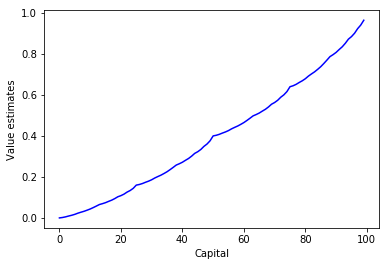

In [6]:
import matplotlib.pyplot as plt
plt.plot(value[:-1], c='b')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

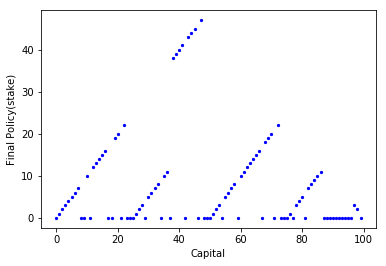

In [8]:
plt.scatter(np.arange(env.nS), policy, c='b', s=5)
plt.xlabel('Capital')
plt.ylabel('Final Policy(stake)')
plt.show()